<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: 

I would be investigating a dataset with over 10,000 movies collected from The Movie Database (TMDb). The Movie Database (TMDb), including user ratings and revenue.I would be exploring the data, analyzing and visualizing key findings.

The column titles include;

id, imdb_id, popularity, budget, revenue, original_title, cast,	homepage, director,	tagline, keywords, overview, runtime, genres, production_companies, release_date,vote_count,vote_average,release_year	budget_adj,revenue_adj
 


### Question(s) for Analysis
The main questions include;
1. Which genres are most popular from year to year?

2. What kinds of properties are associated with movies that have high revenues?


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [5]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.5MB/s eta 0:00:01   42% |█████████████▊                  | 4.5MB 31.8MB/s eta 0:00:01    57% |██████████████████▌             | 6.0MB 32.3MB/s eta 0:00:01    71% |███████████████████████         | 7.5MB 27.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01   30% |██████████                      | 4.1MB 21.3MB/s eta 0:00:01    49% |████████████████                | 6.7MB 28.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [10]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
df.shape

(10866, 21)

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

I would be cleaning the data by taking out columns with titles "imdb_id", "original_title", "cast", "homepage", "director", "tagline", "keywords", "overview", and "production_companies".
I would do so the limit the structure of the data needed for analysis.

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], axis = 1, inplace = True)

In [15]:
df.head()

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id              10866 non-null int64
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1018.8+ KB


I would like to confirm if the genre colum has null values or missing values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8f28c25f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8f264a6a0>]], dtype=object)

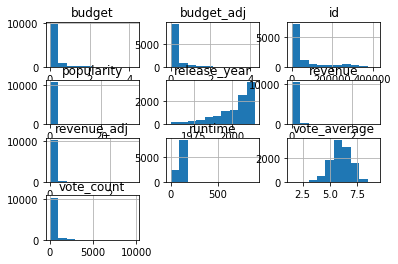

In [17]:
df.hist()

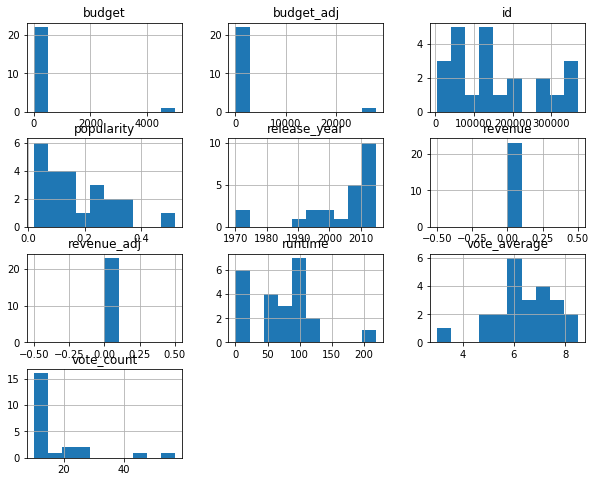

In [33]:
df[df.genres.isnull()].hist(figsize=(10,8));

In [34]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id              10866 non-null int64
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1018.8+ KB


I would like to view the null values in the genres column

In [18]:
df[df.genres.isnull()]

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,0,0,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,0.129696,0,0,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,0.330431,0,0,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,0.302095,0,0,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,0.020701,0,0,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,0.081892,0,0,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,0.068411,0,0,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,0.130018,0,0,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,0.145331,0,0,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,0.520520,0,0,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


I would like to drop all null values to ensure all column titles have the same number of respective rows.

In [19]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 12 columns):
id              10843 non-null int64
popularity      10843 non-null float64
budget          10843 non-null int64
revenue         10843 non-null int64
runtime         10843 non-null int64
genres          10843 non-null object
release_date    10843 non-null object
vote_count      10843 non-null int64
vote_average    10843 non-null float64
release_year    10843 non-null int64
budget_adj      10843 non-null float64
revenue_adj     10843 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which genres are most popular from year to year?)

Finding the most popular genre from year to year

I will be aggregating the data

In [20]:
grouped_year = df.groupby(['release_year','genres'])['popularity'].mean()
grouped_year

release_year  genres                                            
1960          Action|Adventure|Drama|History|Western                0.310398
              Action|Adventure|Western                              1.872132
              Action|Drama|Foreign|History|War                      0.194948
              Action|Drama|History                                  1.136943
              Action|Drama|History|War                              0.256779
              Action|Drama|Romance|Western                          0.266435
              Action|Drama|Western                                  0.421043
              Action|Western                                        0.267118
              Adventure|Family                                      0.465879
              Adventure|Fantasy|Science Fiction                     0.144106
              Comedy                                                0.180871
              Comedy|Drama|Romance                                  0.668774
           

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [24]:
newsummary = grouped_year.unstack()
newsummary.head()

genres,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Comedy|Drama,Action|Adventure|Animation|Comedy|Family,Action|Adventure|Animation|Drama|Family,Action|Adventure|Animation|Family,Action|Adventure|Animation|Family|Fantasy,Action|Adventure|Animation|Family|Mystery,Action|Adventure|Animation|Family|Science Fiction,...,Western|Comedy,Western|Comedy|Drama|Music,Western|Drama,Western|Drama|Adventure|Thriller,Western|Drama|Comedy|Romance,Western|Drama|Crime|Romance,Western|History,Western|History|War,Western|Horror|Thriller,Western|Thriller
release_year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
value = newsummary.max(axis = 1)
value.head()

release_year
1960    2.610362
1961    2.631987
1962    3.170651
1963    2.508235
1964    3.153791
dtype: float64

Conversion to dataframe

In [29]:
newdataframe = pd.DataFrame(value, columns = ['mean_popularity'])
newdataframe.head()

,mean_popularity
release_year,
1960,2.610362
1961,2.631987
1962,3.170651
1963,2.508235
1964,3.153791


Aggregating movie_genre

In [28]:
movie_genre = newsummary.idxmax(axis = 1)
movie_genre = pd.DataFrame(movie_genre, columns= ['genres'])
movie_genre.head()

,genres
release_year,
1960,Drama|Horror|Thriller
1961,Adventure|Animation|Comedy|Family
1962,Adventure|Action|Thriller
1963,Action|Thriller|Adventure
1964,Adventure|Action|Thriller


Combining the dataframes

In [33]:
combined_dataframe = pd.merge(movie_genre, newdataframe, left_index = True, right_index = True)
combined_dataframe

,genres,mean_popularity
release_year,,
1960,Drama|Horror|Thriller,2.610362
1961,Adventure|Animation|Comedy|Family,2.631987
1962,Adventure|Action|Thriller,3.170651
1963,Action|Thriller|Adventure,2.508235
1964,Adventure|Action|Thriller,3.153791
1965,Adventure|Action|Thriller,1.910465
1966,Animation|Family|Comedy,1.227582
1967,Family|Animation|Adventure,2.550704
1968,Science Fiction|Mystery|Adventure,3.309196


### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


Summarizing the dataset

In [34]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,65868.491930,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,5.147332e+07
std,91977.394803,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.447664e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.500000,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20558.000000,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75182.000000,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I would be looking for valid revenue values

In [35]:
new_revenue = df.query('revenue_adj != 0')
new_revenue.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4850.000000,4850.000000,4.850000e+03,4.850000e+03,4850.000000,4850.000000,4850.000000,4850.000000,4.850000e+03,4.850000e+03
mean,44575.000619,1.045109,2.956970e+07,8.922066e+07,107.964742,436.215876,6.148763,2000.921649,3.516102e+07,1.150774e+08
std,72361.405911,1.356628,4.051343e+07,1.620684e+08,21.112847,806.416200,0.798795,11.569192,4.375672e+07,1.988419e+08
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8286.000000,0.387754,1.700000e+06,7.708081e+06,95.000000,46.000000,5.600000,1994.000000,2.332078e+06,1.046262e+07
50%,12154.500000,0.680289,1.500000e+07,3.182654e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.392749e+07
75%,43956.500000,1.210457,4.000000e+07,9.991823e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


I would find out how each variable corelates to the revenue

In [36]:
new_revenue.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.140275,-0.068388,-0.040843,-0.031101,0.069930,0.007712,0.506683,-0.145813,-0.115445
popularity,0.140275,1.000000,0.481101,0.629316,0.201249,0.788298,0.289021,0.170210,0.440051,0.561760
budget,-0.068388,0.481101,1.000000,0.703986,0.247158,0.585855,0.037417,0.237927,0.964006,0.560626
revenue,-0.040843,0.629316,0.703986,1.000000,0.237811,0.764122,0.206958,0.121289,0.674327,0.905011
runtime,-0.031101,0.201249,0.247158,0.237811,1.000000,0.252367,0.308205,-0.099556,0.304123,0.263979
vote_count,0.069930,0.788298,0.585855,0.764122,0.252367,1.000000,0.351330,0.196756,0.533281,0.666509
vote_average,0.007712,0.289021,0.037417,0.206958,0.308205,0.351330,1.000000,-0.095035,0.049115,0.242429
release_year,0.506683,0.170210,0.237927,0.121289,-0.099556,0.196756,-0.095035,1.000000,0.083282,-0.099530
budget_adj,-0.145813,0.440051,0.964006,0.674327,0.304123,0.533281,0.049115,0.083282,1.000000,0.593273
revenue_adj,-0.115445,0.561760,0.560626,0.905011,0.263979,0.666509,0.242429,-0.099530,0.593273,1.000000


I would find out the mean budget for the the groups


In [40]:
x1 = hrev['budget_adj'].mean()
x2 = lrev['budget_adj'].mean()
x1,x2

(76987831.786343589, 20887154.011546813)

I would illustrate the data in the form of a bar chart

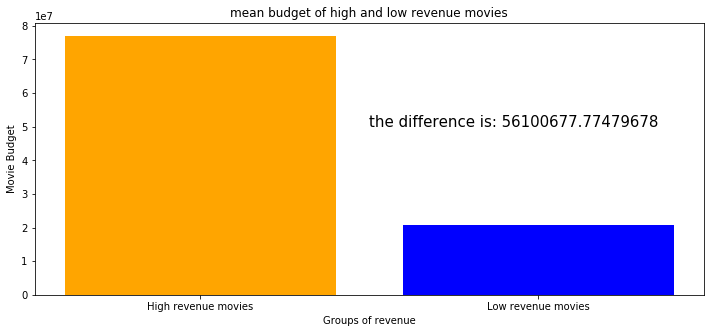

In [43]:
plt.figure(figsize = (12,5))
plt.bar((1,2),(x1,x2), tick_label = ('High revenue movies','Low revenue movies'),color= ('orange','blue'))
plt.text(1.5,5*1e7, r'the difference is: {}'.format(x1-x2), fontsize=15)
plt.title('mean budget of high and low revenue movies')
plt.xlabel('Groups of revenue')
plt.ylabel('Movie Budget');

Movies with high revenues tend to have a higher budget allocation based on the bar chart illustration.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In conclusion, adventure movies tend to be the most viewed movie genres throughout the years. Movies with high revenues tend to have a higher budget allocation. This means there is a corelation between high movie budgets and high revenue movies.

Limitation:
Nan and missing values. Some rows of data had to be deleted since we encountered such values. I suggest there should be another way to tackle the issue of missing values or Nan values.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])